In [6]:
!pip install kaggle

In [7]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# dataset api
!kaggle datasets download -d vaishnaviasonawan  ie/indian-sign-language-dataset

100% 267M/268M [00:14<00:00, 17.4MB/s]
100% 268M/268M [00:14<00:00, 19.1MB/s]


In [9]:
!ls

indian-sign-language-dataset.zip  kaggle.json  sample_data


In [10]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/indian-sign-language-dataset.zip'

with ZipFile(dataset, 'r') as zip :
  zip.extractall()
  print('The Dataset is Extracted')

The Dataset is Extracted


In [11]:
!ls

data  indian-sign-language-dataset.zip	kaggle.json  sample_data


**IMPORTING THE DEPENDENCIES**

In [12]:
import cv2
import os
import random
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras import backend as K

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Displaying an Image

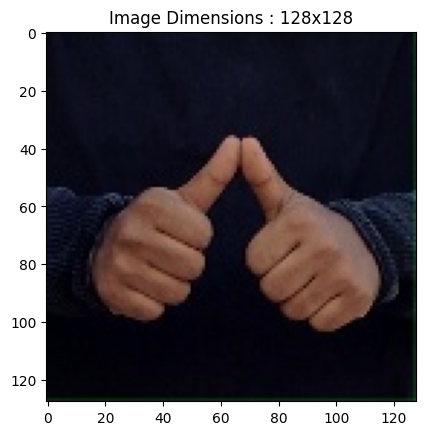

In [13]:

# Directory containing your subdirectories
base_dir = 'data/'

# Specify the subdirectory you want to display the first image from
subdirectory_name = 'A'  # Replace with the desired subdirectory

# Combine the base directory and subdirectory path
subdirectory_path = os.path.join(base_dir, subdirectory_name)

# List all image files in the specified subdirectory
image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]

# Check if there are any image files in the subdirectory
if image_files:
    # Select the first image in the list
    first_image_path = image_files[0]


    # Load and display the first image using Keras and matplotlib
    img = image.load_img(first_image_path)

    img_width, img_height = img.size


    plt.imshow(img)
    plt.title(f"Image Dimensions : {img_width}x{img_height}")
    plt.axis('on')
    plt.show()
else:
    print("No image files found in the subdirectory.")


In [14]:
# Base directory containing all sub directories
image_dir = 'data/'

# Desired dimension for the resize image
width = 256
height = 256

# Creating an Image Data Generator for processing
datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    rotation_range = 20
)

# Iterate through the image in the directory
for root, dirs, files in os.walk(image_dir) :
  for file in files :

    image_path = os.path.join(root,file)

    # Load the image and resize it using datagen

    img = load_img(image_path)
    img = img_to_array(img)
    img = datagen.random_transform(img)

    # Save the resized image back to the original location

    array_to_img(img).save(image_path)

print('All image resized')

All image resized


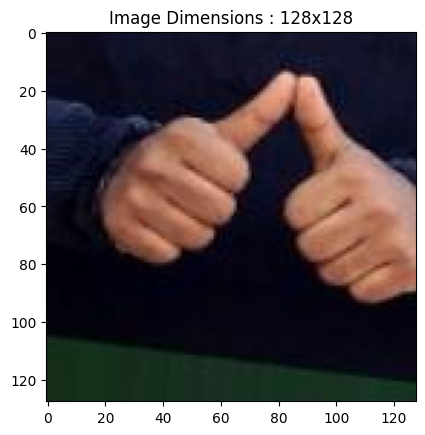

In [15]:

# Directory containing your subdirectories
base_dir = 'data/'

# Specify the subdirectory you want to display the first image from
subdirectory_name = 'A'  # Replace with the desired subdirectory

# Combine the base directory and subdirectory path
subdirectory_path = os.path.join(base_dir, subdirectory_name)

# List all image files in the specified subdirectory
image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]

# Check if there are any image files in the subdirectory
if image_files:
    # Select the first image in the list
    first_image_path = image_files[0]

    img = image.load_img(first_image_path)
    img_width, img_height = img.size

    # Load and display the first image using Keras and matplotlib

    plt.imshow(img)
    plt.title(f"Image Dimensions : {img_width}x{img_height}")
    plt.axis('on')
    plt.show()
else:
    print("No image files found in the subdirectory.")

Converting into Gray-Scale image

In [16]:
import os
from keras.preprocessing import image
import cv2  # Import OpenCV

# Directory containing your subdirectories
base_dir = 'data/'

# List all subdirectories
subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Iterate through the subdirectories
for subdirectory_name in subdirectories:
    # Combine the base directory and subdirectory path
    subdirectory_path = os.path.join(base_dir, subdirectory_name)

    # List all image files in the specified subdirectory
    image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]

    # Check if there are any image files in the subdirectory
    if image_files:
        print(f"Subdirectory: {subdirectory_name}")

        for image_path in image_files:
            # Load the image using Keras
            img = image.load_img(image_path)

            # Convert the image to grayscale using OpenCV
            img_gray = cv2.cvtColor(image.img_to_array(img), cv2.COLOR_RGB2GRAY)

            # Save the grayscale image back to the original location
            cv2.imwrite(image_path, img_gray)

print("Grayscale conversion and saving completed.")


Subdirectory: A
Subdirectory: I
Subdirectory: Z
Subdirectory: 8
Subdirectory: M
Subdirectory: X
Subdirectory: B
Subdirectory: G
Subdirectory: T
Subdirectory: V
Subdirectory: W
Subdirectory: 1
Subdirectory: 9
Subdirectory: U
Subdirectory: 3
Subdirectory: L
Subdirectory: D
Subdirectory: Y
Subdirectory: C
Subdirectory: O
Subdirectory: H
Subdirectory: 7
Subdirectory: 5
Subdirectory: R
Subdirectory: 2
Subdirectory: N
Subdirectory: 6
Subdirectory: Q
Subdirectory: 4
Subdirectory: E
Subdirectory: K
Subdirectory: S
Subdirectory: P
Subdirectory: F
Subdirectory: J
Grayscale conversion and saving completed.


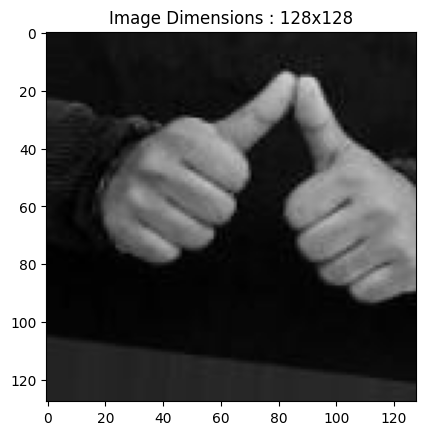

In [17]:

# Directory containing your subdirectories
base_dir = 'data/'

# Specify the subdirectory you want to display the first image from
subdirectory_name = 'A'  # Replace with the desired subdirectory

# Combine the base directory and subdirectory path
subdirectory_path = os.path.join(base_dir, subdirectory_name)

# List all image files in the specified subdirectory
image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]

# Check if there are any image files in the subdirectory
if image_files:
    # Select the first image in the list
    first_image_path = image_files[0]


    # Load and display the first image using Keras and matplotlib
    img = image.load_img(first_image_path)


    img_width, img_height = img.size


    plt.imshow(img)
    plt.title(f"Image Dimensions : {img_width}x{img_height}")
    plt.axis('on')
    plt.show()
else:
    print("No image files found in the subdirectory.")


**Create Dataframe from Images**

In [18]:
base_path = '/content/data'